<a href="https://colab.research.google.com/github/adachao/EECE5510/blob/master/Programming_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2021-11-15 20:19:04--  https://github.com/Henry-Medeiros/images/raw/master/img_dist_pc2.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Henry-Medeiros/images/master/img_dist_pc2.png [following]
--2021-11-15 20:19:04--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/img_dist_pc2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503946 (492K) [image/png]
Saving to: ‘img_dist_pc2.png’

img_dist_pc2.png    100%[===================>] 492.13K  --.-KB/s    in 0.006s  

2021-11-15 20:19:05 (76.8 MB/s) - ‘img_dist_pc2.png’ saved [503946/503946]



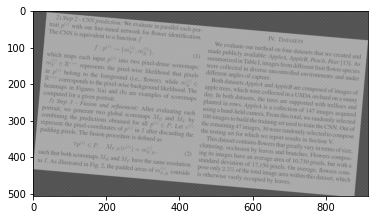

In [1]:
#The image below has been distorted by a geometric transformation and corrupted by high-frequency periodic noise.
import cv2
import matplotlib.pyplot as plt

!wget "https://github.com/Henry-Medeiros/images/raw/master/img_dist_pc2.png"
img = cv2.imread('img_dist_pc2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Necessary to have only one channel
plt.imshow(img, 'gray')
plt.show()

[[0.33333333 0.31145644 0.30465176 ... 0.24268461 0.44980364 0.3815277 ]
 [0.50330181 0.12303213 0.15573963 ... 0.39586739 0.22826393 0.23722038]
 [0.37643038 0.30894843 0.32445924 ... 0.53846266 0.15993141 0.19610535]
 ...
 [0.90111616 0.7104408  0.45524224 ... 0.78372814 0.67710109 0.52347375]
 [0.69923428 0.67105313 0.67669263 ... 0.87936531 0.70036816 0.52221753]
 [0.53058606 0.59213714 0.82720009 ... 0.60511172 0.6440606  0.74334371]]


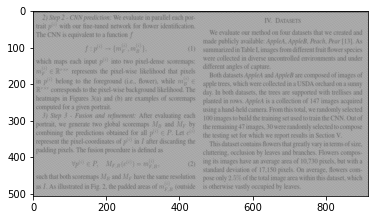

In [11]:
#1. Identify and remove the geometric distortion.
import numpy as np
import scipy.misc, math
from skimage.transform import AffineTransform, warp
import matplotlib.pyplot as plt

#try different translation and rotation, then we could see what result we could get
#transformation = AffineTransform(translation=(150, 100), rotation=50/180.0*np.pi)
#transformation = AffineTransform(translation=(100, 50), rotation=25/180.0*np.pi)
#transformation = AffineTransform(translation=(50, 50), rotation=15/180.0*np.pi)
#transformation = AffineTransform(translation=(50, 0), rotation=7/180.0*np.pi)
#transformation = AffineTransform(translation=(40, 0), rotation=5/180.0*np.pi)
transformation = AffineTransform(translation=(40, 0), rotation=5/180.0*np.pi,scale=(0.96,0.85))
scaled_img = warp(img, transformation)

print(scaled_img)
plt.imshow(scaled_img,'gray')
plt.show()

[]

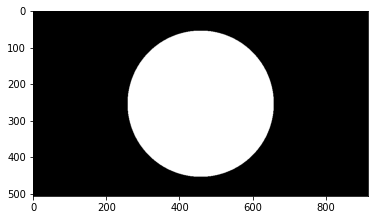

In [19]:
#2. Identify the frequency of the periodic noise and design an appropriate low-pass filter to remove it.
import numpy as np
import matplotlib.pyplot as plt

dims = img.shape
d0 = 200
#set x and y
x =range(dims[1])
y =range(dims[0])
xv,yv = np.meshgrid(x,y)
#using the Euclidean distance
duv = np.linalg.norm([xv-dims[1]/2,yv-dims[0]/2], axis=0)
#the function of lowpass
mask = duv < d0

plt.imshow(255*mask,'gray')
plt.plot()


[]

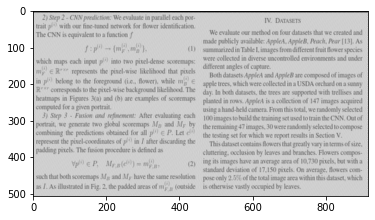

In [20]:
#lowpass filter
#fft
fft_img = np.fft.fft2(scaled_img)
#shift the fourier 
fft_shift_img = np.fft.fftshift(fft_img)
#get the convolution
filt_fft_img = fft_shift_img*mask

cen_img=np.fft.ifft2(filt_fft_img)
recon_img = abs(cen_img)

plt.imshow(recon_img,'gray')
plt.plot()

Otsu's threshold from skimage = 0.6075659427796836


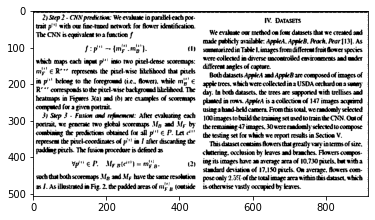

In [23]:
#3. Binarize the image to segment the text from the background.
from skimage.filters.thresholding import threshold_otsu
thresh = threshold_otsu(np.asarray(recon_img))

print("Otsu's threshold from skimage = {}".format(thresh))

#threshold image
img_otsu = 255*(recon_img > thresh)

plt.imshow(img_otsu, 'gray')
plt.show()